In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
conectividad = pd.read_csv('/content/drive/MyDrive/PI02/Conectividad por provincia.csv', sep=';')
penetracion = pd.read_csv('/content/drive/MyDrive/PI02/penetracion2.csv', sep=';')

aqui podemos observar las estadisticas de nuestro primer dataset, conectividad, como resultado un total de 4312 datos, el dataset no contiene informacion muy variada, por lo que los resultados siempre estan entre 0 y 1, debido al tipo de datos que estamos manejando

In [3]:
conectividad.describe()

,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,Acceso_internet
count,4.312000e+03,4312.000000,4312.000000,4312.00000,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000,4312.000000,4312.00000
mean,8.693093e+03,0.262755,0.203154,0.09346,0.335343,0.250232,0.519944,0.501391,0.435993,0.596939,0.80334
std,3.821544e+04,0.440182,0.402393,0.29111,0.472165,0.433197,0.499660,0.500056,0.495944,0.490570,0.39752
min,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.160000e+02,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
50%,5.755000e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.00000
75%,3.202000e+03,1.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
max,1.317298e+06,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Al explorar la variable población por medio de un histograma, se evidencia que la mayoria de localidades cuentan con una poblacion entre 0 y 140.000 habitantes.

(0.0, 4500.0)

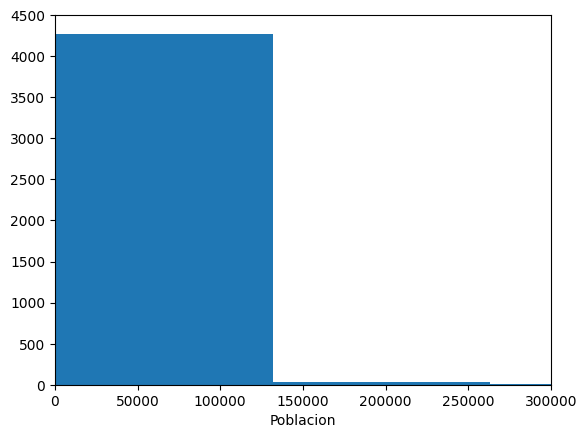

In [4]:
plt.hist(conectividad['Poblacion'])
plt.xlabel('Poblacion')
plt.xlim(0,300000)
plt.ylim(0,4500)


En este mapa de calor se observa la correlacion que existe entre las variables del dataset, las variables mas correlacionadas son '4G' y 'Acceso a Internet', entiendo asi, que el porcentaje de acceso a internet aumenta a medida de que la poblacion con 4G tambien aumenta, tambien se puede interpretar como una variable que determina que todas las personas que tienen 4G cuentan con un acceso a internet.
Por el contrario, la variable 'satelital' tiene muy poca correlacion con la variable 'Wireless', este resultado se debe a que son variables muy independientes, hablando de servicios diferentes.
En general, se puede notar que las variables no tienen una correlacion muy alta entre si, tal vez porque estamos hablando de diferentes tipos de tecnologias distribuidas por todo el pais.

<ipython-input-5-587563981b2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(conectividad.corr(method='pearson'), annot=True, cmap="crest")


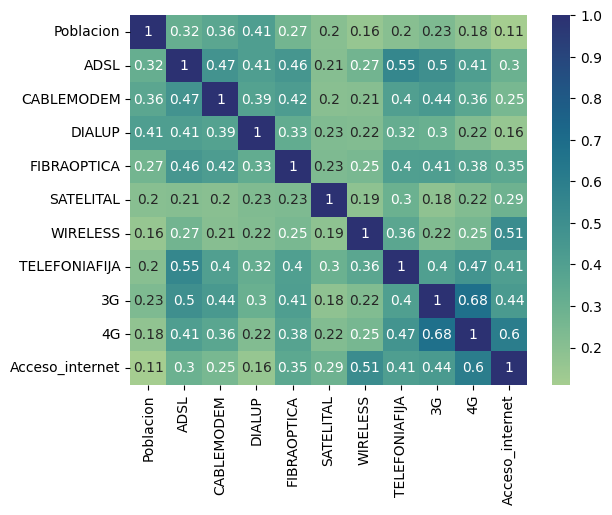

In [5]:
sns.heatmap(conectividad.corr(method='pearson'), annot=True, cmap="crest")
plt.show()

In [ ]:
conectividad2= pd.DataFrame({'valor': (conectividad[conectividad['4G']==0]).count()['4G'],'label':'4G_0'}, index=[0])
conectividad2['valor']= (conectividad[conectividad['4G']==1]).count()['4G']
conectividad2['label']= '4G_1'
conectividad2
conexion = pd.Series(['4G','3G','FIBRAOPTICA','SATELITAL', 'CABLEMODEM', 'DIALUP', 'WIRELESS', 'ADSL', 'TELEFONIAFIJA'],name='conexion')
Sin_Acceso = pd.Series([(conectividad[conectividad['4G']==0]).count()['4G'],
                    (conectividad[conectividad['3G']==0]).count()['3G'],
                    (conectividad[conectividad['FIBRAOPTICA']==0]).count()['FIBRAOPTICA'],
                    (conectividad[conectividad['SATELITAL']==0]).count()['SATELITAL'],
                    (conectividad[conectividad['CABLEMODEM']==0]).count()['CABLEMODEM'],
                    (conectividad[conectividad['DIALUP']==0]).count()['DIALUP'],
                    (conectividad[conectividad['WIRELESS']==0]).count()['WIRELESS'],
                    (conectividad[conectividad['ADSL']==0]).count()['ADSL'],
                    (conectividad[conectividad['TELEFONIAFIJA']==0]).count()['TELEFONIAFIJA']],name='Sin_Acceso')
Con_Acceso = pd.Series([(conectividad[conectividad['4G']==1]).count()['4G'],
                    (conectividad[conectividad['3G']==1]).count()['3G'],
                    (conectividad[conectividad['FIBRAOPTICA']==1]).count()['FIBRAOPTICA'],
                    (conectividad[conectividad['SATELITAL']==1]).count()['SATELITAL'],
                    (conectividad[conectividad['CABLEMODEM']==1]).count()['CABLEMODEM'],
                    (conectividad[conectividad['DIALUP']==1]).count()['DIALUP'],
                    (conectividad[conectividad['WIRELESS']==1]).count()['WIRELESS'],
                    (conectividad[conectividad['ADSL']==1]).count()['ADSL'],
                    (conectividad[conectividad['TELEFONIAFIJA']==1]).count()['TELEFONIAFIJA']],name='Sin_Acceso')
conectividad2=pd.concat([conexion,Sin_Acceso],axis=1)
conectividad2


En este grafico de barras apiladas se puede observar la cantidad de la poblacion que tiene acceso (Si, barra azul) y los que no tienen acceso (No, barra anaranjada) a cada una de las tecnologías descritas en la coordenada X. pudiendo notar que la tecnología con menos conexiones es DIALUP, debido a que este tipo de conexión ya esta cayendo en la obsolescencia, mientras que la variable con mas conexiones es '4G', entendiendo que la mayoria de habitantes del país cuentan con acceso a internet desde sus dispositivos móviles, seguido de Wireless y tecnologia Fija.

Text(0, 0.5, 'Poblacion')

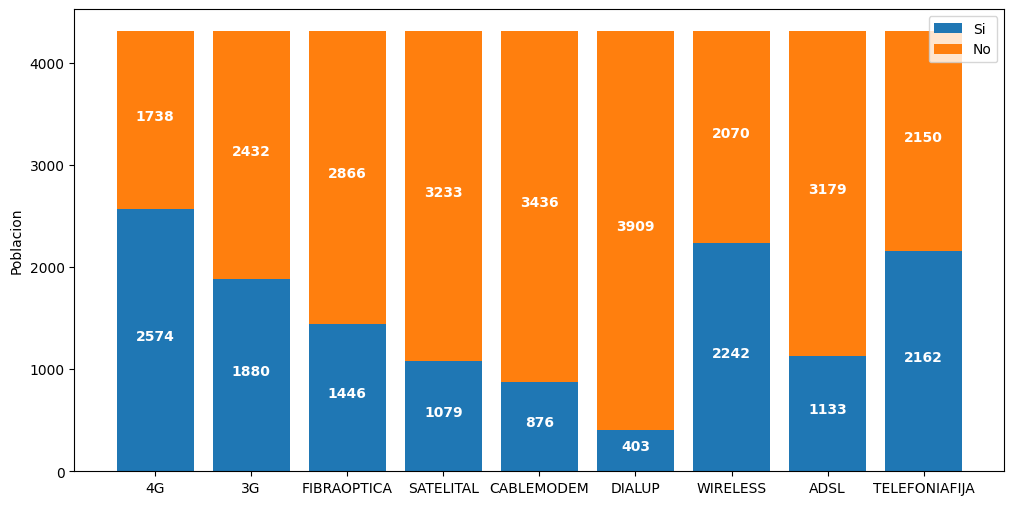

In [29]:
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(conexion, Con_Acceso, label = "Si")
ax.bar(conexion, Sin_Acceso, bottom = Con_Acceso, label = "No")
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha = 'center',
          color = 'w', weight = 'bold', size = 10)
ax.legend(loc = 'upper right')
ax.set_ylabel('Poblacion')